In [1]:
import numpy as np
import time
import pandas as pd
from sklearn.linear_model import LinearRegression

Palak Soni

2020DMB07

Algorithims and Data Structures 

## Motivation from : codesansar for gaussian ellimination concept and pseudo code and geeks for geeks concept clarity and code algorithms

https://www.pythonpool.com/gaussian-elimination-python/


In [2]:
def gaussian_elimination(A, b):
  ''' This function performs Gaussian elimination.
      Input is an nxn numpy array A and a vector b of length n.'''
  n = np.shape(A)[0] # number of rows = number of columns = n
  count = 0

  for k in range(0, n-1): # 0, 1, 2, ... n-2 eqv 1, 2, 3, ..., n-1
    for i in range(k+1, n): # k+1, k+2, ..., n-1 
      m_ik = A[i,k]/A[k,k] 
      b[i] = b[i] - m_ik*b[k]

      # count no. of mult. and div. in each step
      count += 2
      for j in range(k+1, n):
        A[i,j] = A[i,j] - m_ik * A[k,j]
        count += 1

  return(A, b, count) 
     


In [3]:
def ge_n(n):
  ''' This function takes as input integer n and returns a random matrix of integers os size nxn.
       This matrix is then input into the gaussian elimitaion function defined above'''
      
  B = np.random.randint(1,100, size=(n, n))
  b = np.random.randint(1,100, size =(n, 1))
  return(gaussian_elimination(B, b))
  

In [ ]:
# using the below code for time in python, actual time taken for various n is computed
start = time.time()
a = ge_n(100)
end = time.time()
print(a, end - start)

In [6]:
# for different n the count and time are computed
df = pd.read_excel('/content/time_python.xlsx')

In [7]:
df

,n,time,count
0,100,1.22,338250
1,200,9.39,2686500
2,300,30.50,9044750
3,400,71.32,21413000
4,500,138.64,41791250


In [11]:
import seaborn as sns

In [13]:
df['log_count'] = np.log(df['count'])

In [14]:
df['n squared'] = np.square(df['n'])

In [16]:
df['n cubed'] = np.power(df['n'], 3)

In [40]:
df['log n'] = np.log(df['n'])

In [24]:
data # count is between n square and n cube

,n,n squared,n cubed,count
0,100,10000,1000000,338250
1,200,40000,8000000,2686500
2,300,90000,27000000,9044750
3,400,160000,64000000,21413000
4,500,250000,125000000,41791250


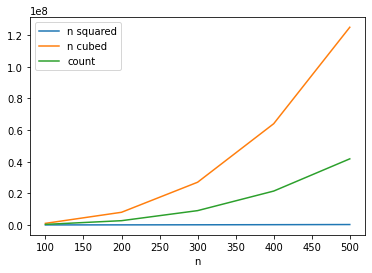

In [26]:
data.plot(x="n", y=["n squared", "n cubed", "count"], kind="line")

In [41]:
X = np.array(df['log n']).reshape(-1, 1)

In [42]:
y = df['log_count']

In [43]:
reg = LinearRegression().fit(X, y)

In [44]:
reg.coef_ # ans is close to 3

array([2.99273645])